In [227]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor


from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Problem statement

### Data Gathering

In [228]:
df=pd.read_csv("Happiness Index_2018-2019.csv")
df.head(2)

,Overall rank,Country or region,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,Afghanistan,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,Afghanistan,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036


### EDA

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Year                          312 non-null    int64  
 3   Score                         312 non-null    float64
 4   GDP per capita                312 non-null    float64
 5   Social support                312 non-null    float64
 6   Healthy life expectancy       312 non-null    float64
 7   Freedom to make life choices  312 non-null    float64
 8   Generosity                    312 non-null    float64
 9   Perceptions of corruption     312 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 24.5+ KB


In [230]:
df.describe()

,Overall rank,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,78.500000,2018.500000,5.391506,0.898298,1.211026,0.661295,0.423538,0.182926,0.111526
std,45.104737,0.500803,1.114631,0.394592,0.300310,0.252724,0.156024,0.096739,0.095296
min,1.000000,2018.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,2018.000000,4.514250,0.609500,1.055750,0.488250,0.322500,0.108750,0.050000
50%,78.500000,2018.500000,5.379500,0.960000,1.265500,0.699000,0.449500,0.175500,0.082000
75%,117.250000,2019.000000,6.176000,1.219500,1.457500,0.858000,0.540250,0.245000,0.141250
max,156.000000,2019.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.598000,0.457000


In [231]:
df.isna().sum()

Overall rank                    0
Country or region               0
Year                            0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [232]:
df.duplicated().sum()

0

<AxesSubplot:>

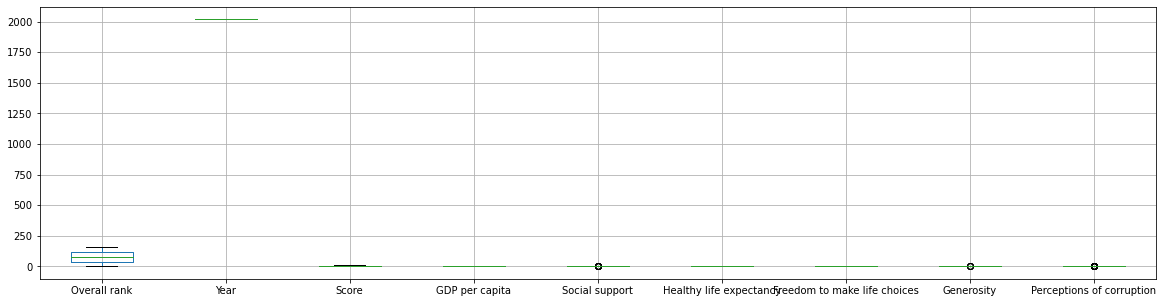

In [233]:
plt.figure(figsize=(20,5))
df.boxplot()

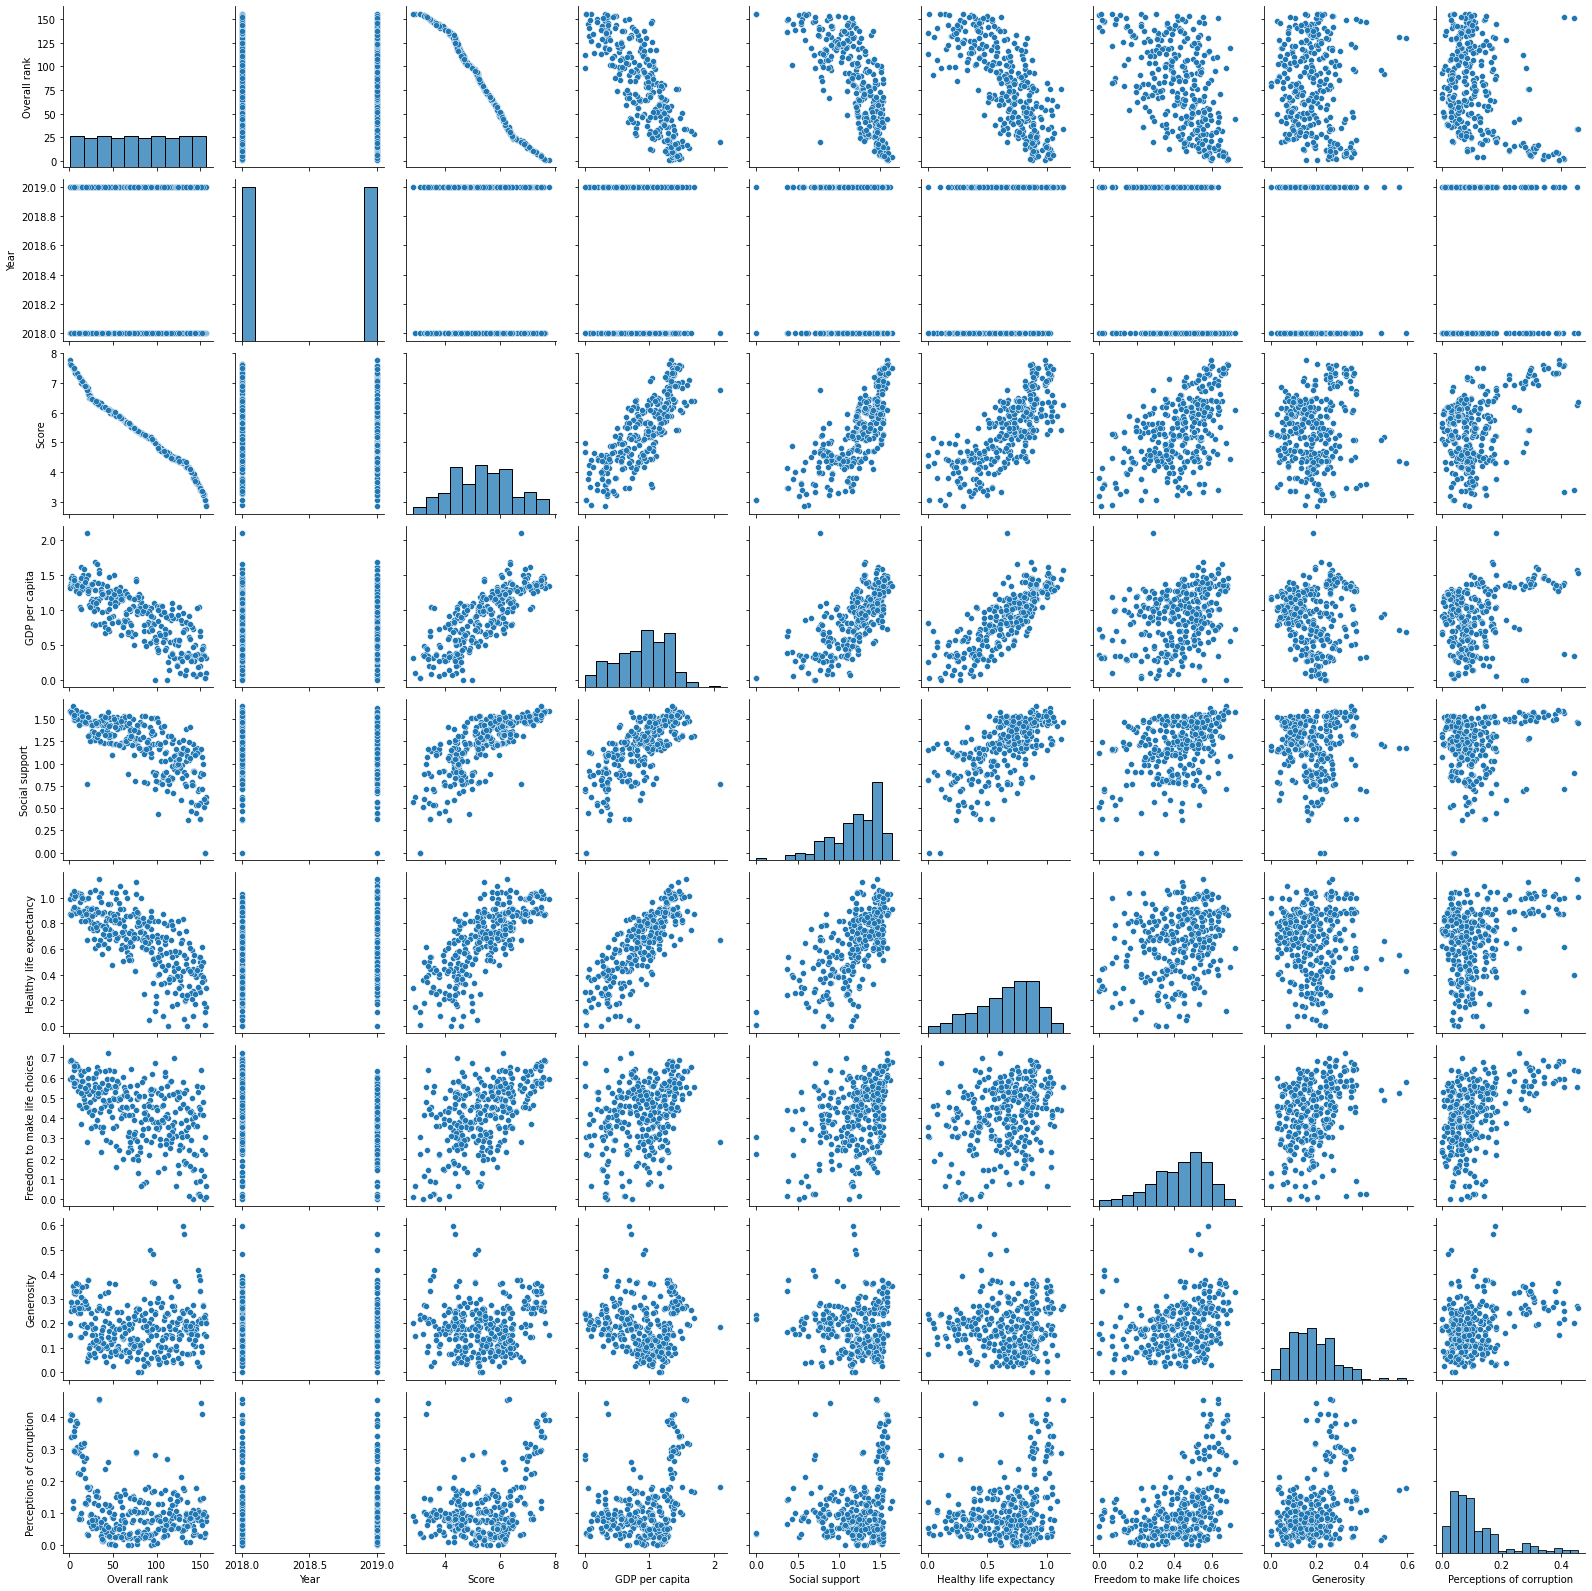

In [234]:
sns.pairplot(df)

<AxesSubplot:>

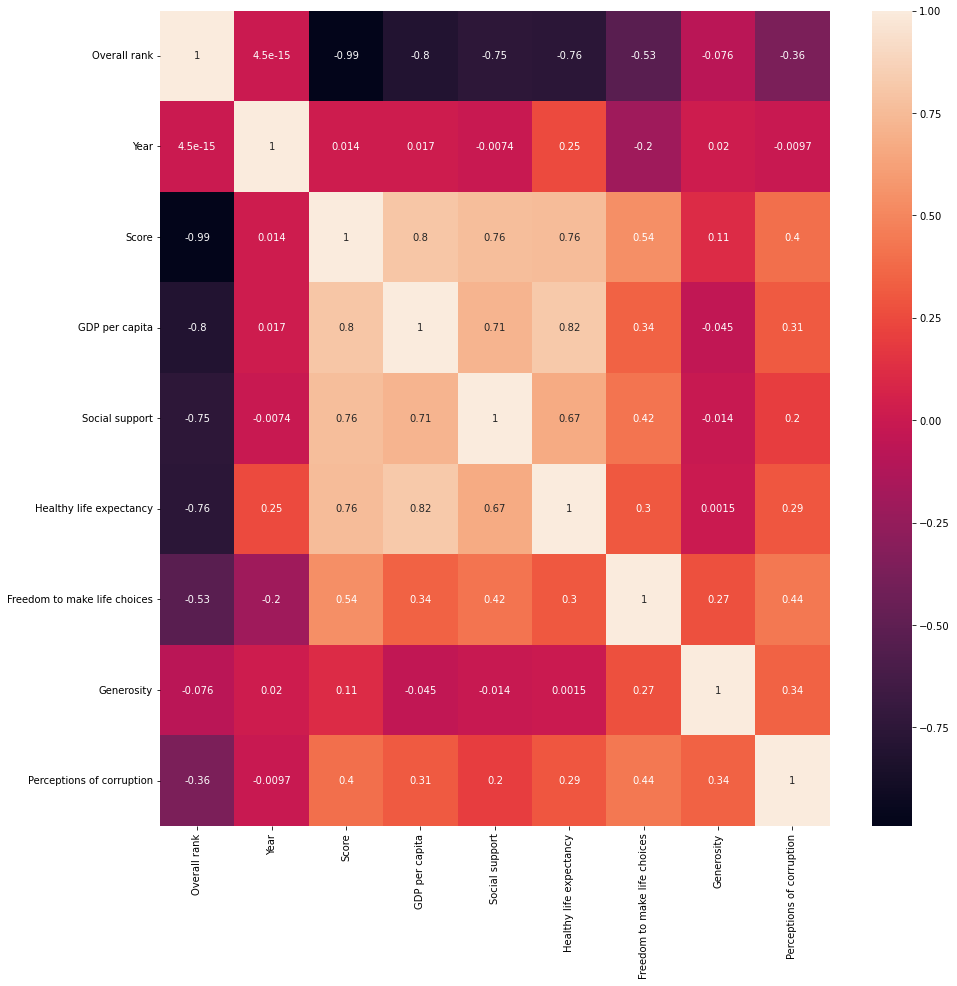

In [235]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

### Feature Engineering

In [236]:
df.drop("Country or region",axis=1,inplace=True)

In [237]:
df.head()

,Overall rank,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,2019,3.203,0.350,0.517,0.361,0.000,0.158,0.025
1,145,2018,3.632,0.332,0.537,0.255,0.085,0.191,0.036
2,107,2019,4.719,0.947,0.848,0.874,0.383,0.178,0.027
3,112,2018,4.586,0.916,0.817,0.790,0.419,0.149,0.032
4,88,2019,5.211,1.002,1.160,0.785,0.086,0.073,0.114


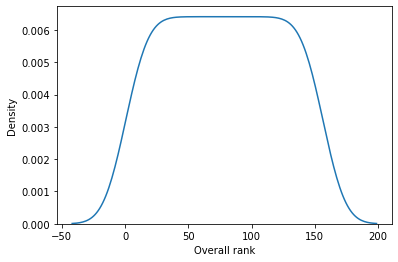

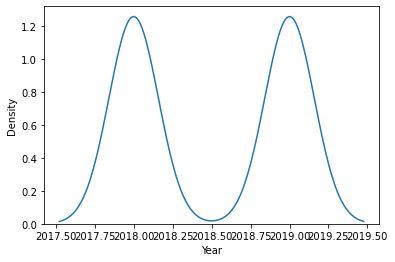

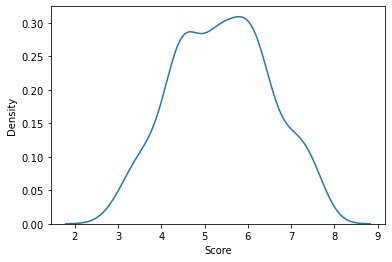

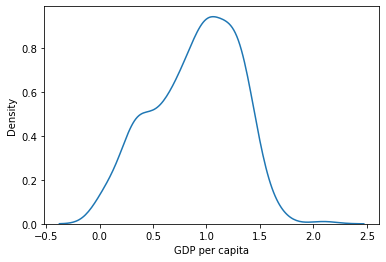

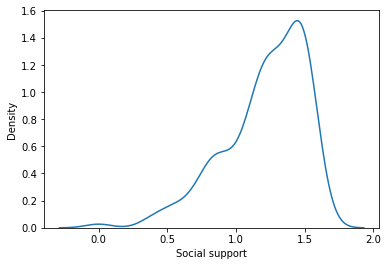

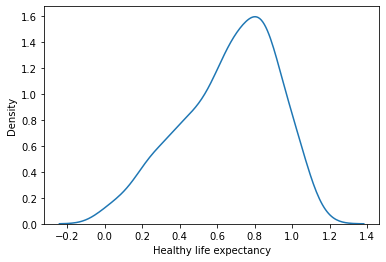

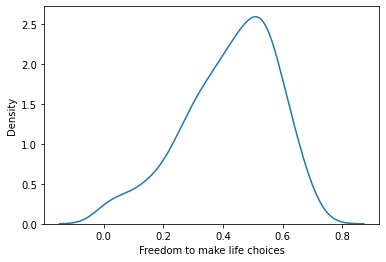

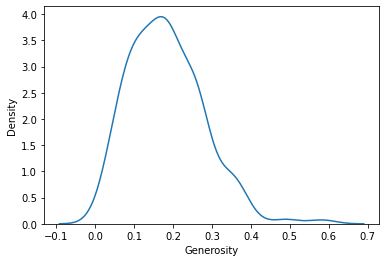

In [238]:
for i in df.columns[:8]:
    sns.kdeplot(df[i])
    plt.show()

In [212]:
scewes='Perceptions of corruption','Generosity','Freedom to make life choices','Social support'

In [213]:
from scipy.stats import boxcox

<AxesSubplot:xlabel='Social support', ylabel='Density'>

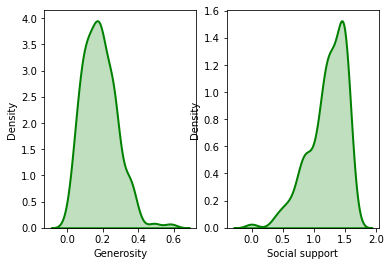

In [214]:
fig, ax = plt.subplots(1, 2)
sns.distplot(df['Generosity'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(df["Social support"], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])

<AxesSubplot:xlabel='Freedom to make life choices', ylabel='Density'>

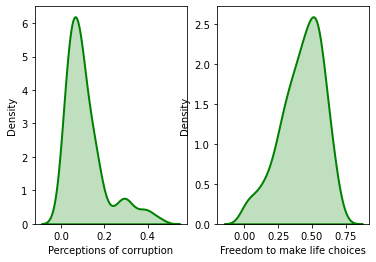

In [239]:
fig, ax = plt.subplots(1, 2)
sns.distplot(df["Perceptions of corruption"], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[0])

sns.distplot(df["Freedom to make life choices"], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])

#### Model Selection

In [240]:
df.head(1)

,Overall rank,Year,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,154,2019,3.203,0.35,0.517,0.361,0.0,0.158,0.025


In [241]:
X=df.drop("Score",axis=1)
y=df.Score

In [242]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [243]:
lin=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ab=AdaBoostRegressor()
xgb=XGBRegressor()
svm=SVR()
models=[lin,knn,dt,rf,ab,xgb,svm]

In [244]:
def get_trained(models,*data):
    model=[]
    for i in models:
        i.fit(x_train,y_train)
        model.append(i)
    return model

In [245]:
len(set(df.columns))

9

In [246]:
trained_models=get_trained(models,x_train,y_train)

In [247]:
def get_results(trained_models,*data):
    result_df=pd.DataFrame(columns=["Model","Training","Testing"])
    for i in trained_models:
        train_accuracy=i.score(x_train,y_train)
        test_accuracy=i.score(x_test,y_test)
        
        print(str(i)[:3],train_accuracy,test_accuracy)
        result_df.loc[len(result_df)]={"Model":str(i)[:5],"Training":train_accuracy,"Testing":test_accuracy}
        
    return result_df        

In [248]:
res=get_results(trained_models,x_train,x_test,y_train,y_test)

Lin 0.9829902949833614 0.9872903256697175
KNe 0.9991467210875415 0.998008844680374
Dec 1.0 0.9954613296087819
Ran 0.999701514243756 0.9977140566512587
Ada 0.9980208825049789 0.9961545263777399
XGB 0.9999990303385146 0.9952991447083596
SVR 0.3905229302520946 0.4010116766237062


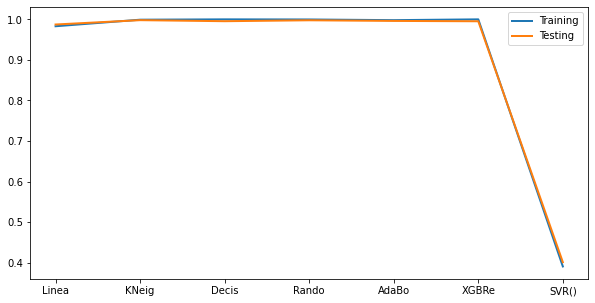

In [249]:
plt.figure(figsize=(10,5))
plt.plot(res.Model,res.Training,res.Testing,linewidth=2,markersize=12)
plt.legend(res.columns[1:])

In [250]:
res

,Model,Training,Testing
0,Linea,0.982990,0.987290
1,KNeig,0.999147,0.998009
2,Decis,1.000000,0.995461
3,Rando,0.999702,0.997714
4,AdaBo,0.998021,0.996155
5,XGBRe,0.999999,0.995299
6,SVR(),0.390523,0.401012


##### Moving forward with Adaboost regressor which has best accuracy

In [251]:
adb=trained_models[4]

### Model Evaluation

In [252]:
# training
yp=adb.predict(x_train)
mse=mean_squared_error(y_train,yp)
mae=mean_absolute_error(y_train,yp)
r2=r2_score(y_train,yp)
print("For Training")
print(f"{mse=},\n{mae=},\n{r2=}")
print()
print("For Testing")
yp=adb.predict(x_test)
mse=mean_squared_error(y_test,yp)
mae=mean_absolute_error(y_test,yp)
r2=r2_score(y_test,yp)
print(f"{mse=},\n{mae=},\n{r2=}")

For Training
mse=0.002539339139965438,
mae=0.03713423166838236,
r2=0.9980208825049789

For Testing
mse=0.004076747939891934,
mae=0.04804108376055709,
r2=0.9961545263777399


##### API Developement

In [253]:
df.columns

Index(['Overall rank', 'Year', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [255]:
test_array=np.zeros(len(X.columns))
test_array

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [257]:
test_array[0]=1
test_array[1]=2019
test_array[2]=1.38
test_array[3]=1.624
test_array[4]=1.026
test_array[5]=0.591
test_array[6]=0.354
test_array[7]=0.118

In [259]:
x_test.tail(1)

,Overall rank,Year,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
114,4,2019,1.38,1.624,1.026,0.591,0.354,0.118


In [260]:
y_test.tail(1)

114    7.494
Name: Score, dtype: float64

In [261]:
adb.predict([test_array])

array([7.55048])

In [264]:
project_data={"columns":list(X.columns)}

import json
with open ("project_data.json","w")as file:
    json.dump(project_data,file)

In [265]:
import pickle

with open("model.pkl","wb")as file:
    pickle.dump(adb,file)